In [84]:
import numpy as np,matplotlib.pyplot as plt,pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic=pd.read_csv(url)

In [35]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [36]:
titanic



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
import seaborn as sb

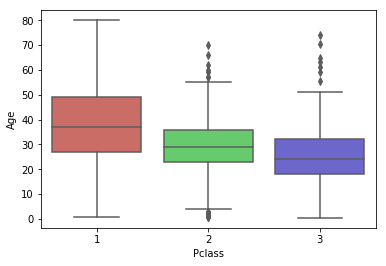

In [39]:
sb.boxplot(x='Pclass',y='Age',data=titanic,palette='hls')

In [40]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1] 
    if pd.isnull(Age): 
        if Pclass==1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [41]:
titanic['Age']=titanic[['Age','Pclass']].apply(age_approx,axis=1)

In [42]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [43]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [44]:
titanic.drop(['Name'],axis=1,inplace=True)

In [45]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
5,6,0,3,male,24.0,0,0,330877,8.4583,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,S
7,8,0,3,male,2.0,3,1,349909,21.0750,S
8,9,1,3,female,27.0,0,2,347742,11.1333,S
9,10,1,2,female,14.0,1,0,237736,30.0708,C


In [46]:
titanic.dropna(inplace=True,axis=0)

In [47]:
titanic.drop(['PassengerId','Ticket','Fare'],axis=1,inplace=True)

In [48]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,24.0,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


In [49]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)

In [50]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [51]:
titanic_cleaned=pd.concat([titanic,gender,embark],axis=1)

In [55]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [52]:
titanic_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,Q,S
0,0,3,male,22.0,1,0,S,1,0,1
1,1,1,female,38.0,1,0,C,0,0,0
2,1,3,female,26.0,0,0,S,0,0,1
3,1,1,female,35.0,1,0,S,0,0,1
4,0,3,male,35.0,0,0,S,1,0,1
5,0,3,male,24.0,0,0,Q,1,1,0
6,0,1,male,54.0,0,0,S,1,0,1
7,0,3,male,2.0,3,1,S,1,0,1
8,1,3,female,27.0,0,2,S,0,0,1
9,1,2,female,14.0,1,0,C,0,0,0


In [53]:
titanic_cleaned.drop(['Sex','Embarked'],axis=1,inplace=True)

In [54]:
titanic_cleaned


,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1
5,0,3,24.0,0,0,1,1,0
6,0,1,54.0,0,0,1,0,1
7,0,3,2.0,3,1,1,0,1
8,1,3,27.0,0,2,0,0,1
9,1,2,14.0,1,0,0,0,0


In [85]:
X=np.matrix(titanic_cleaned.iloc[:,1:8].values)

In [86]:
y=np.matrix(titanic_cleaned.iloc[:,0:1].values)

In [87]:
X

matrix([[ 3., 22.,  1., ...,  1.,  0.,  1.],
        [ 1., 38.,  1., ...,  0.,  0.,  0.],
        [ 3., 26.,  0., ...,  0.,  0.,  1.],
        ...,
        [ 3., 24.,  1., ...,  0.,  0.,  1.],
        [ 1., 26.,  0., ...,  1.,  0.,  0.],
        [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [88]:
y

matrix([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=81)

In [128]:
X_train.shape

(622, 7)

In [129]:
logreg=LogisticRegression(solver='lbfgs')
#not setting a solver will give a warning

In [130]:
logreg
#EITHER OF THE TWO METHODS GIVEN BELOW CAN BE USED
y_train=np.array(y_train).ravel()
#y_train=y_train.reshape(622,)

In [131]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
logreg.score(X_train,y_train)

0.8038585209003215

In [133]:
logreg.score(X_test,y_test)

0.8202247191011236